In [1]:
#using pandas to get the dataset from csv file that we donloaded from kaggle
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [2]:
#to see the first five rows from data
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [20]:
#to get no.of people's data and no.of features
df.shape

(768, 9)

The dataset has 768 females data , 8 measurements , 1 outcome (whether risk at diabetes or not).

In [21]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [22]:
#first person's measurements
df.loc[0]

Pregnancies                 6.399473e-01
Glucose                     8.651081e-01
BloodPressure              -3.351824e-02
SkinThickness               6.655021e-01
Insulin                    -3.345079e-16
BMI                         1.662917e-01
DiabetesPedigreeFunction    4.684920e-01
Age                         1.425995e+00
Outcome                     1.000000e+00
Name: 0, dtype: float64

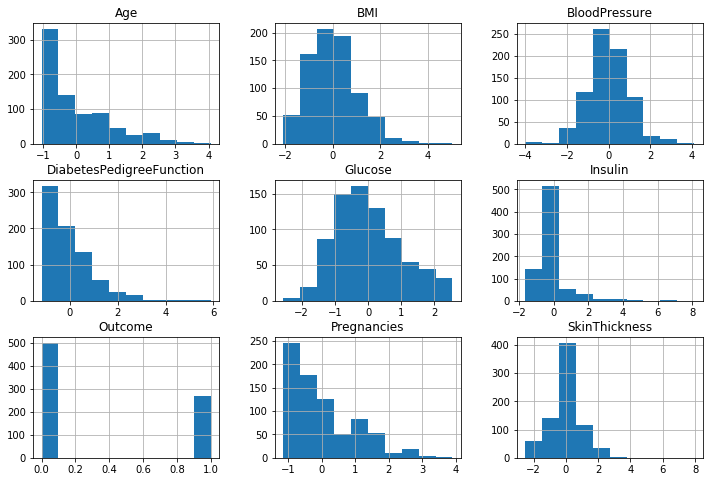

In [23]:
from matplotlib import pyplot as plt

# visualizing the distribution of the nine variables in the dataset to gain insight from the data
df.hist(figsize = (12,8))
plt.show()


from the histogram plot we can visualize that:
#Age - the dataset contains most of the young aged women ,
#BMI , BloodPressure , Glucose is Normally distributed. And mostly ,these features has 0 values (it should not be) , may be those have missing values.. lets check while preprocessing data
#Pregnencies - has almost 15 .. its a little shock , it may contains outliers it affects our model ..

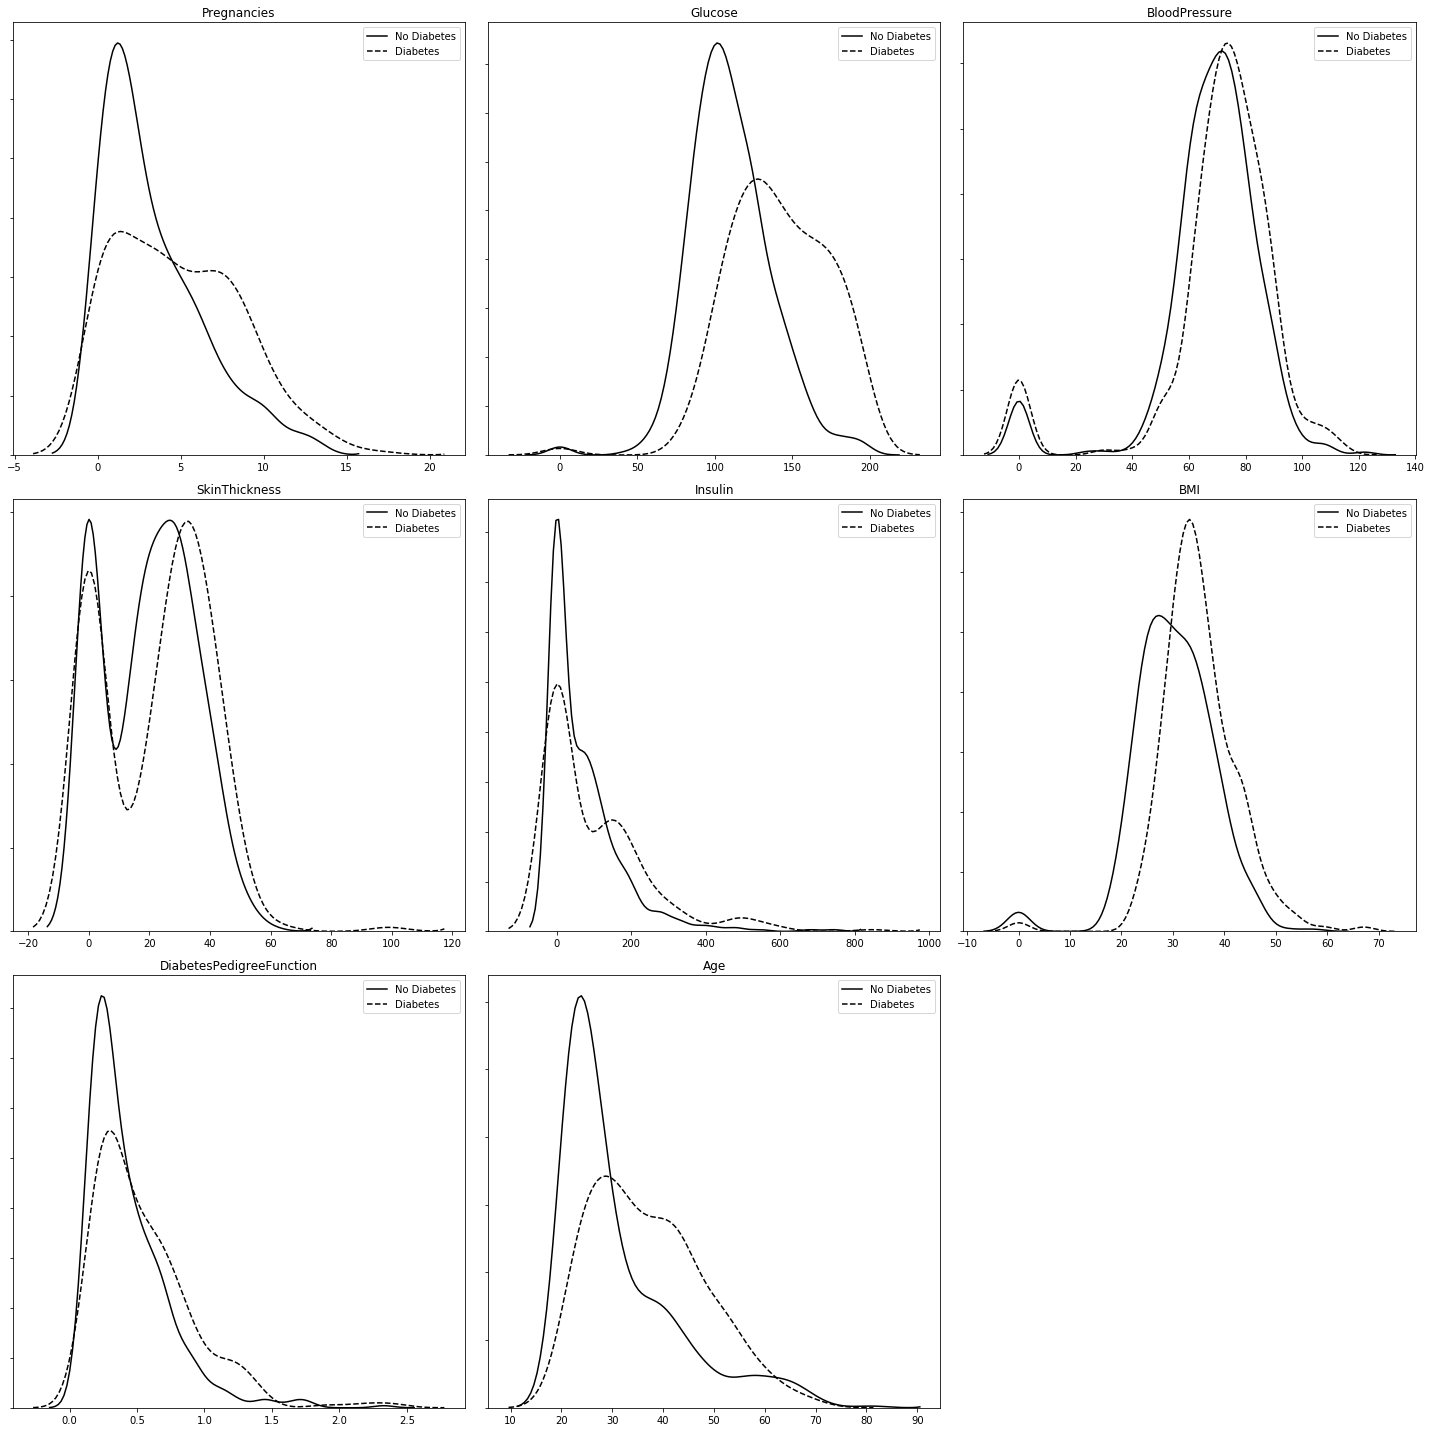

In [4]:
#seaborn has a data visualization that follows Density plot to visualize the relationship between variables and the outcome .
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Plot a density plot for each variable
# create a subplot of 3 x 3
plt.subplots(3,3,figsize=(20,20))

#We can plot a density plot to investigate the relationship between each variable and the target variable
# Plot a density plot for each variable
for idx, col in enumerate(df.columns):
    ax = plt.subplot(3,3,idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel= False, kde_kws={'linestyle':'-', 'color':'black', 'label':"No Diabetes"})
    sns.distplot(df.loc[df.Outcome == 1][col], hist=False, axlabel= False, kde_kws={'linestyle':'--', 'color':'black', 'label':"Diabetes"})
    ax.set_title(col)

# Hide the 9th subplot (bottom right) since there are only 8 plots
plt.subplot(3,3,9).set_visible(False)
plt.tight_layout()
plt.show()


#from the distplot ,we gain insights like In Glucose - people with No diabetes has Normally distributed and its mean is around 100mg/dL. people with diabetes has a mean of 150mg/dL
from this we can get ,if the person having high BMI,Glucose,and are older they tends to have diabetes..

#BloodPressure and SkinThickness has same values for both diabetes and Non-diabetes people,then these both features are not useful predictors for the model

In [24]:
#DATA PREPROCESSING

1)check whether there is a missing values in the dataset - it lowers the performance of the model.

2)Scaling the input features to get the model performance better .
it should be done becoz while visualizing histogram we see DPF has values btw (0 , 2.5) and Insulin has values btw (0 , 700).

In [6]:
#checking missing values in the dataset
print(df.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


There is no missing values but histogram shows in Glucose ,BMI,BloodPressure,Insulin has 0 values in the dataset but it is not missing values..,ie,.Wgether there be a persons who are not used to give their measurements or else,there may be some technical default in the machine ..

A better way to check the missing values is:

In [7]:
#This gives min ,max ,mean,quartile values to get insghts of data
print(df.describe()) 

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

See, every feature has 768 values (no missing values) , but seeing quite intutively the minimum values in Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI has 0 in it .(this should not be valid data for us).

We need to do some techniques to get rid of that missing data (0 values).

In [8]:
#This is done by
print("Number of rows with 0 values for each variable")
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))
 

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


Insulin has half of the missing value (0's) in it. This is done by replacing those 0's with NaN value to work easily in pandas Leaving pregnancies because, there is a chance that a women have no children.

In [9]:
#replace the 0 values with Nan fisrt so that  pandas will understand that these values are invalid:
import numpy as np

df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)


Techniques to avoid Missing values,

1) These missing NaN is done by making the mean or median or mode of the seperate columns and add those to the missing NaN values

2) droping those rows that contains missing values in it.

In [25]:
#Here we cant drop those rows becoz there are so many missng values in the data.SO, we can add the mean values to them instead
#replace Nan values with the mean of existing values
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [10]:
#again checking with columns
print("Number of rows with 0 values for each variable")
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [11]:
#SCALING THE FEATURES - Data Standardization
#To standardize our data
from sklearn import preprocessing
df_scaled = preprocessing.scale(df)

#Since the object returned by the preprocessing.scale() function is no longer a pandas DataFrame, let's convert it back:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns) 

#since we do not want to scale the Outcome column
df_scaled['Outcome'] = df['Outcome'] 
df = df_scaled

In [12]:
#lets have a look at mean, standard deviation and the max of each of the transformed variables:

print(df.describe().loc[['mean', 'std','max'],].round(2).abs())

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
mean         0.00     0.00            0.0           0.00     0.00  0.00   
std          1.00     1.00            1.0           1.00     1.00  1.00   
max          3.91     2.54            4.1           7.95     8.13  5.04   

      DiabetesPedigreeFunction   Age  Outcome  
mean                      0.00  0.00     0.35  
std                       1.00  1.00     0.48  
max                       5.88  4.06     1.00  


In [13]:
#let's separate the dataset into X (input features) and y (target variable):
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'Outcome'] 
y = df.loc[:, 'Outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Finally, make the second split to create the final training set and the validation set:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# Building MultiLayer Network using keras
Here ,there will be 1- input layer , 2-hidden layers and 1-output layer.

Input Layer ------> consist of 8 nodes (features)

Hidden Layer ------> 2- hidden layers with arbitary units

Output Layer ------> 1- output layer that predicts (0-No risk of diabetes , 1-risk of diabetes)

Actiavtion function :
#ReLU (Rectified Linear Unit) takes negative values as 0 and it slightly increses from 0 to inf (positive values)
#Sigmoid function - Squashes the values btween 0 and 1 . changes to Probability value

#We use ReLU function (efficient) for the 1-st hidden layer & 2nd hidden layer and sigmoid for output layer(efficient)

#Optimizer - to update weights and biases
#loss - as this problem tends to classification, we used binary_crossentropy
#metrics - gives correctness of the model

In [18]:
import warnings
warnings.filterwarnings("ignore")

# Build neural network in Keras
from keras.models import Sequential

model = Sequential()
# Add the first hidden layer 
from keras.layers import Dense 
model.add(Dense(32, activation='relu', input_dim=8))

# Add the second hidden layer
model.add(Dense(16, activation='relu')) #ReLU function does is to simply consider only the non-negative portion of the original , and to treat the negative portion as 0. 
# Add the output layer 
model.add(Dense(1, activation='sigmoid'))
# Compile the model 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # binary_crossentropy as our loss function since the problem at hand is a binary classification problem. 
# Train the model for 200 epochs
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
491/491 [==============================] - 0s 937us/step - loss: 0.7072 - acc: 0.4990
Epoch 2/200
491/491 [==============================] - 0s 43us/step - loss: 0.6449 - acc: 0.6375
Epoch 3/200
491/491 [==============================] - 0s 53us/step - loss: 0.5999 - acc: 0.6945
Epoch 4/200
491/491 [==============================] - 0s 49us/step - loss: 0.5606 - acc: 0.7189
Epoch 5/200
491/491 [==============================] - 0s 41us/step - loss: 0.5246 - acc: 0.7495
Epoch 6/200
491/491 [==============================] - 0s 53us/step - loss: 0.4960 - acc: 0.7739
Epoch 7/200
491/491 [==============================] - 0s 41us/step - loss: 0.4754 - acc: 0.7739
Epoch 8/200
491/491 [==============================] - 0s 45us/step - loss: 0.4608 - acc: 0.7760
Epoch 9/200
491/491 [==============================] - 0s 39us/step - loss: 0.4508 - acc: 0.7739
Epoch 10/200
491/491 [==============================] - 0s 47us/step - loss: 0.4433 - acc: 0.7800
Epoch 11/200
491/491 [======

In [27]:
#Results analysis 
#Evaluating the model using training set
scores = model.evaluate(X_train, y_train) 
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

#Evaluating the model using testing set
scores = model.evaluate(X_test, y_test) 
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100)) 

491/491 [==============================] - 0s 477us/step
Training Accuracy: 93.89%

154/154 [==============================] - 0s 92us/step
Testing Accuracy: 74.03%



#While predicting the model tells us that it classifies correctly with 80% accuracy

Text(33.0, 0.5, 'Actual')

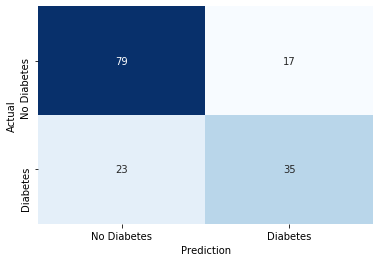

In [16]:
#construct a confusion matrix 
from sklearn.metrics import confusion_matrix 
import seaborn as sns

y_test_pred = model.predict_classes(X_test)
c_matrix = confusion_matrix(y_test, y_test_pred)

#using heatmap we can visualize effectively
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'], cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")


Clearly, we want our false positive and false negative numbers to be as low as possible, and for the true negative and true positive numbers to be as high as possible.

we can see that most predictions are true negatives and true positives (as indicated by the 78.57% test accuracy in the previous section). The remaining 19 predictions are false negatives and 14 other predictions are false positives, which are undesirable.

Text(0, 0.5, 'True Positive Rate')

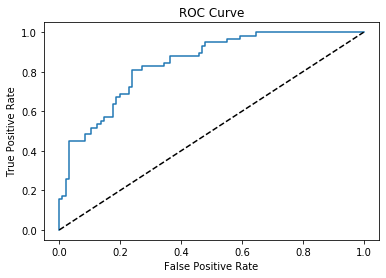

In [17]:
#Plot ROC curve- for classification (to seek the model perfpormance in a better way)
#sklearn provides roc_curve
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt

y_test_pred_probs = model.predict(X_test)  # returns the probability values - sigmoid
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

#plotting the roc auc curve 
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#This shows that our model is able to differentiate samples of different classes, making good predictions.


# The model is good at prediction which gives 80% accuracy